In [6]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [7]:
(X_train, Y_train) , (X_test, Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


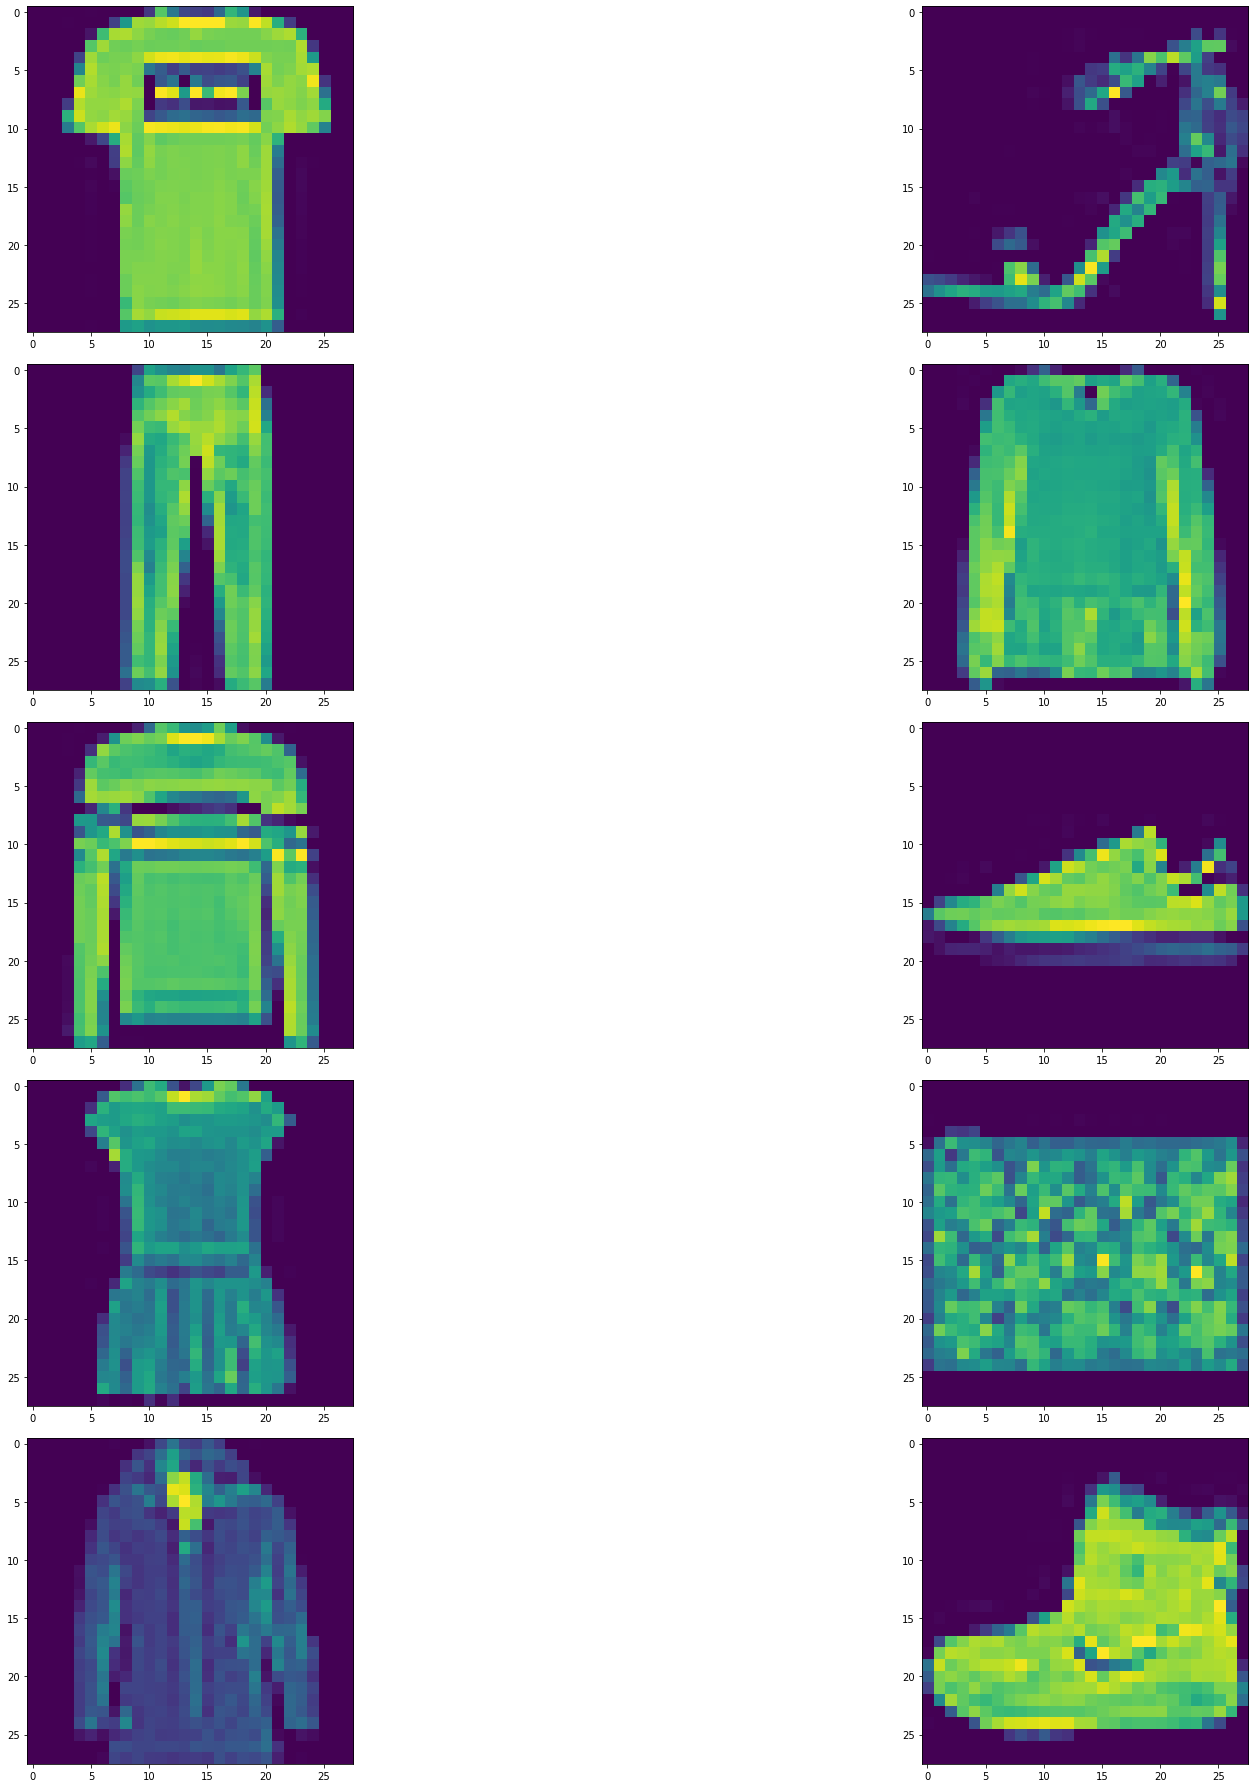

In [9]:
done = set()
fig, ax = plt.subplots(5, 2, figsize = (25, 25))
fig.tight_layout()
for x, y in zip(X_train, Y_train):
    if y not in done:
        done.add(y)
        ax[y % 5, y // 5].imshow(x)

In [3]:
class FNNClassifier:
    def __init__(self, hidden_layer_sizes=(100,), activation='relu', optimizer='adam', weight_decay=0.0001, batch_size=200, learning_rate=0.001, num_epochs=200, weight_init='xavier'):
        self.hidden_layer_sizes = hidden_layer_sizes # Tuple of hidden layer sizes
        self.activation = activation # 'identity', 'logistic', 'tanh', 'relu'
        self.optimizer = optimizer # 'normal', 'sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam'
        self.weight_decay = weight_decay # L2 regularization hyperparameter
        self.batch_size = batch_size # Batch size
        self.learning_rate = learning_rate # Learning Rate
        self.num_epochs = num_epochs # Number of epochs
        self.weight_init = weight_init # 'random', 'xavier'
    
    def act(self, z):
        if(self.activation == 'identity'):
            return z
        elif(self.activation == 'logistic'):
            return 1 / (1 + np.exp(-z))
        elif(self.activation == 'tanh'):
            return np.tanh(z)
        elif(self.activation == 'relu'):
            return np.maximum(z, np.zeros(z.shape)) 
    
    def deriv_act(self, z):
        if(self.activation == 'identity'):
            return np.ones(z.shape)
        elif(self.activation == 'logistic'):
            return 1 / (2 + np.exp(-z) + np.exp(z))
        elif(self.activation == 'tanh'):
            return np.cosh(z) ** -2
        elif(self.activation == 'relu'):
            return np.maximum(np.sign(z), np.zeros(z.shape))
    
    def oact(z):
        return np.exp(z) / np.exp(z).sum()
    
    def forward_prop(self, X):
        self.a, self.h = np.zeros((self.L, self.N, self.n)), np.zeros((self.L, self.N, self.n))
        self.h[0] = X
        self.aL = np.zeros((self.K, self.n))
        
        for i in range(1, self.L):
            self.a[i] = (self.b[i] + np.matmul(self.W[i].T, self.h[i - 1]))
            self.h[i] = act(self.a[i])
        self.aL = act(self.bL + np.matmul(self.WL.T, self.h[L - 1]))
        Y_pred = oact(self.aL)
        return Y_pred
    
    def back_prop(self, Y, Y_pred):
        self.gradW, self.gradB, self.gradh, self.grada = [], [], [], []
        self.grada.append(-(self.ey - Y_pred))
        for i in range (L, 0, -1):
            self.gradW.append(np.matmul(self.grada[L - i], self.h[L - i - 1].T))
            self.gradB.append(self.grada[L - i])
            self.gradh.append(np.matmul(self.W[L - i].T, self.grada[L - i]))
            self.grada.append(np.matmul(self.gradh[L - i]) * derivact(self.a[L - i - 1]))
            
            #if(self.optimizer == 'sgd'):
            
        return
    
    def grad_desc(self, X, Y):
        W = np.zeros((self.L, self.N, self.N))
        b = np.zeros((self.L, self.N))
        WL = np.zeros((self.N, self.K))
        bL = np.zeros(self.K)
        update_W, update_b, update_WL, update_bL = W, b, WL, bL
        v_W, v_b, v_WL, v_bL = W, b, WL, bL
        t = 0
        while t < self.num_epochs:
            t += 1
            Y_pred = forward_prop(X)
            
            if(self.optimizer == 'nesterov'):
                W , b, WL, bL = self.W, self.b, self.WL, self.bL
                ngamma = 0.9 # Hyperparameter
                self.W -= ngamma * update_W
                self.b -= ngamma * update_b
                self.WL -= ngamma * update_WL
                self.bL -= ngamma * update_bL
            
            back_prop(Y, Y_pred)
            
            dW = np.asarray(self.gradW[L:0:-1])
            db = np.asarray(self.gradB[L:0:-1])
            dWL = np.asarray(self.gradW[0])
            dbL = np.asarray(self.gradB[0])
            
            if(self.optimizer == 'normal'):
                update_W = self.learning_rate * dW
                update_b = self.learning_rate * db
                update_WL = self.learning_rate * dWL
                update_bL = self.learning_rate * dbL
                
            #elif(self.optimizer == 'sgd'):
                
                
            elif(self.optimizer == 'momentum'):
                mgamma = 0.9 # Hyperparameter
                update_W = mgamma * update_W + self.learning_rate * dW
                update_b = mgamma * update_b + self.learning_rate * db
                update_WL = mgamma * update_WL + self.learning_rate * dWL
                update_bL = mgamma * update_bL + self.learning_rate * dbL
            
            elif(self.optimizer == 'nesterov'):
                self.W, self.b, self.WL, self.bL = W , b, WL, bL
                update_W = ngamma * update_W + self.learning_rate * dW
                update_b = ngamma * update_b + self.learning_rate * db
                update_WL = ngamma * update_WL + self.learning_rate * dWL
                update_bL = ngamma * update_bL + self.learning_rate * dbL
            
            elif(self.optimizer == 'rmsprop'):
                rbeta = 0.9
                epsilon = 0.1
                v_W = rbeta * v_W + (1 - rbeta) * (dW ** 2)
                v_b = rbeta * v_b + (1 - rbeta) * (db ** 2)
                v_WL = rbeta * v_WL + (1 - rbeta) * (dWL ** 2)
                v_bL = rbeta * v_bL + (1 - rbeta) * (dbL ** 2)
                update_W = (self.learning_rate * dW) / np.sqrt(v_W + epsilon)
                update_b = (self.learning_rate * db) / np.sqrt(v_b + epsilon)
                update_WL = (self.learning_rate * dWL) / np.sqrt(v_WL + epsilon)
                update_bL = (self.learning_rate * dbL) / np.sqrt(v_bL + epsilon)
                
            #elif(self.optimizer == 'adam'):
                 
            #elif(self.optimizer == 'nadam'):
            
            self.W -= update_W
            self.b -= update_b
            self.WL -= update_WL
            self.bL -= update_bL
    
    def fit(self, X_train, Y_train):
        self.n, self.N = X_train.shape
        self.K = np.max(Y_train)
        self.ey = np.zeros((self.K, self.n))
        rows = np.arange(n)
        self.ey[Y - 1, rows] = 1
        grad_desc(X_train.T, Y_train.T)
        
    def predict(self, X_test):
        return forward_prop(X_test.T).T